In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GridWorld import get_standard_grid, get_negative_grid
from iterative_policy_eval import printValues, printPolicy
from monte_carlo_utils import max_dict

In [2]:
GAMMA = 0.9
ALPHA = 0.1
ACTIONS = ('U', 'D', 'L', 'R')

def epsilon_greedy(Q, s, eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(ACTIONS)
    else:
        a_opt = max_dict(Q[s])[0] # argmax
        return a_opt

rewards:
-------------------------
-0.10|-0.10|-0.10| 1.00|
-------------------------
-0.10| 0.00|-0.10|-1.00|
-------------------------
-0.10|-0.10|-0.10|-0.10|
it: 0
it: 2000
it: 4000
it: 6000
it: 8000


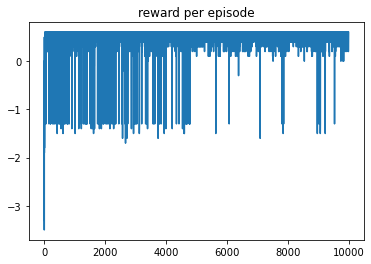

update counts:
-------------------------
 0.11| 0.11| 0.19| 0.00|
-------------------------
 0.11| 0.00| 0.09| 0.00|
-------------------------
 0.20| 0.10| 0.10| 0.00|
values:
-------------------------
 0.55| 0.74| 1.00| 0.00|
-------------------------
 0.39| 0.00| 0.76| 0.00|
-------------------------
 0.25| 0.35| 0.54| 0.37|
policy:
-------------------------
 R | R | R |   |
-------------------------
 U |   | U |   |
-------------------------
 U | R | U | L |


In [5]:
grid = get_negative_grid(step_cost=-.1)

print("rewards:")
printValues(grid.rewards, grid)

Q = {}
states = grid.all_states()
for s in states:
    Q[s] = {}
    for a in ACTIONS:
        Q[s][a] = 0

update_counts = {}

rewards_per_episode = []
for it in range(10000):
    if it % 2000 == 0:
        print("it:", it)

    # begin episode
    s = grid.reset()
    a = epsilon_greedy(Q, s, eps=.1)

    episode_reward = 0
    while not grid.game_over():
        r = grid.move(a)
        s2 = grid.current_state()

        episode_reward += r

        a2 = epsilon_greedy(Q, s2, eps=.1)

        Q[s][a] = Q[s][a] + ALPHA * (r + GAMMA * Q[s2][a2] - Q[s][a])
        update_counts[s] = update_counts.get(s, 0) + 1

        s = s2
        a = a2
    rewards_per_episode.append(episode_reward)

plt.plot(rewards_per_episode)
plt.title("reward per episode")
plt.show()

policy = {}
V = {}

for s in grid.actions.keys():
    a, max_q = max_dict(Q[s])
    policy[s] = a
    V[s] = max_q

print("update counts:")
total = np.sum(list(update_counts.values()))
for k, v in update_counts.items():
    update_counts[k] = float(v) / total

printValues(update_counts, grid)

print("values:")
printValues(V, grid)
print("policy:")
printPolicy(policy, grid)
